In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read in all words
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [5]:
#build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
string_to_index = {s:i+1 for i,s in enumerate(chars)}
string_to_index['.'] = 0
index_to_string = {i:s for s,i in string_to_index.items()}
print(index_to_string)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [6]:
#build the dataset
block_size = 3 #context length: how many characters do we take to predict the next one
X, Y = [], []  #X input to neuro net, and Y label for each example in X

for w in words:
    #print(w)
    context = [0] * block_size # [0, 0, 0]
    for ch in w + '.':
        ix = string_to_index[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(index_to_string[i] for i in context), '---->', index_to_string[ix])
        context = context[1:] + [ix] #crop and append

X = torch.tensor(X)
Y = torch.tensor(Y)

In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [8]:
C = torch.randn((27,2))

In [9]:
#implementing embedding
#An embedding is a way to convert raw data (words, tokens, images, categories, IDs, positions, nodes, etc.) into a vector of real numbers that a neural network can understand.
#Neural networks work only with real-valued tensors, not text, categories, IDs, words, or tokens.
#Most raw data is not numeric, so we need to convert it to vectors that capture meaning.
#randomly initializes matrix of embeding
#27 characters, 2 for reduce information representation from 30 (in Bengio paper) to 2 dimension
C = torch.randn((27, 2))

In [10]:
C

tensor([[-0.5002,  0.5083],
        [-0.7694, -1.3891],
        [ 0.2801,  2.9592],
        [ 0.7372,  0.2291],
        [-0.6765, -0.3928],
        [ 0.8392, -0.0585],
        [-2.1773,  1.6985],
        [ 0.3888, -0.7608],
        [ 0.8181, -0.2852],
        [-1.8779, -1.1443],
        [-0.3428, -2.3623],
        [-0.2331, -1.0052],
        [ 0.3839,  1.1631],
        [ 0.1278,  2.4408],
        [-0.2735, -0.3142],
        [-0.7459, -0.8196],
        [ 0.5203,  0.9027],
        [ 0.9445,  0.4211],
        [ 0.1623,  0.5016],
        [-0.5347,  0.5289],
        [-1.7563,  1.5327],
        [-0.1118, -0.3846],
        [ 0.6697, -1.9761],
        [ 0.3049,  0.6708],
        [-1.3142,  0.4112],
        [ 1.4615, -1.3368],
        [-0.4731, -2.4694]])

In [11]:
#example of embeding '5'
C[5] #C[X]

tensor([ 0.8392, -0.0585])

In [12]:
#In the other file makemore_from_scratch, we encoded first and then we multiply them
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.8392, -0.0585])

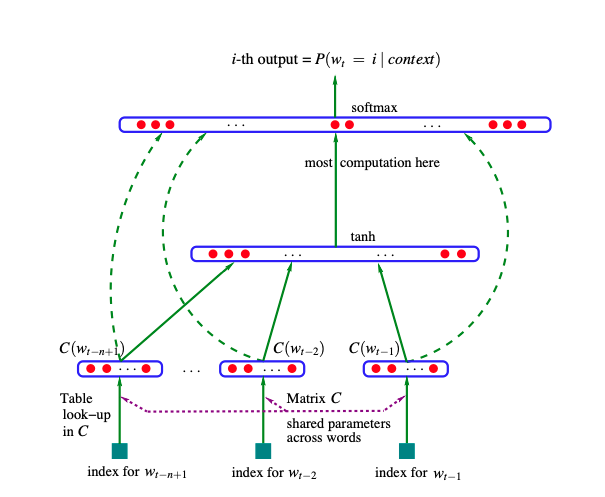

In [13]:
#we can see in the model we embedded the index as input and search for it in our Matrix C, we can see that we can follow two approaches
#use the index itself to search directly
#or hot encode the input and feed to the first layer and weight the C matrix

In [14]:
C[[5,6,7]]

tensor([[ 0.8392, -0.0585],
        [-2.1773,  1.6985],
        [ 0.3888, -0.7608]])

In [15]:
C[torch.tensor([5, 6, 7, 7, 7])]

tensor([[ 0.8392, -0.0585],
        [-2.1773,  1.6985],
        [ 0.3888, -0.7608],
        [ 0.3888, -0.7608],
        [ 0.3888, -0.7608]])

In [16]:
C[X].shape

torch.Size([228146, 3, 2])

In [17]:
print(C[X[0]])
C[X][:1]

tensor([[-0.5002,  0.5083],
        [-0.5002,  0.5083],
        [-0.5002,  0.5083]])


tensor([[[-0.5002,  0.5083],
         [-0.5002,  0.5083],
         [-0.5002,  0.5083]]])

In [18]:
emb = C[X]
emb.shape

torch.Size([228146, 3, 2])

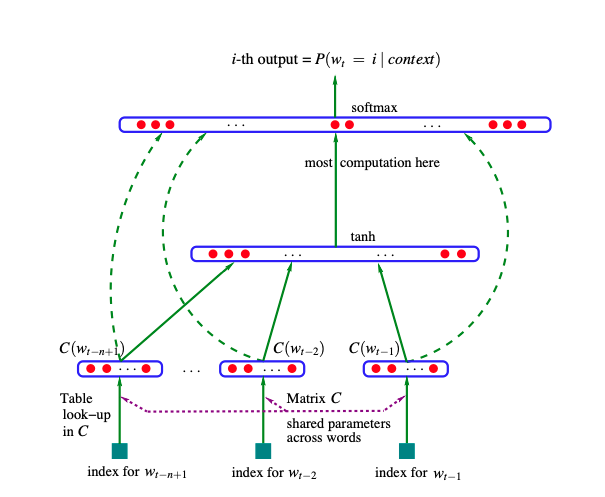

In [19]:
#creation of hidden layer
# we know that our embedding inputs are 3 blocks and two values embedding each block
#[[-0.6065, -1.0747],
#[-0.6065, -1.0747],
#[-0.6065, -1.0747]]
#so we have a 6 = 3 * 2 inputs, and number of neurons are up to us
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [20]:
#goal multiply emb @ W1 + b1 but we have (32, 3, 2) @ (6,100) => we need to convert 3,2 to 6
#torch has a lot of transform functions that can work for this but we need to come up with something
#fit to our problem
#print(emb[0])
#print(emb[0,0])
#print(emb[0,0,0])
#so this brings me all of the arrays, within the first block, with all embeded values
#emb[:,0,:]
#second block
#emb[:,1,:]
#third block
#emb[:,2,:]

In [21]:
#so with torch we can concatenate them into a single dimension having the 6 inputs
#torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]], dim=1).shape

In [22]:
#but it's not useful for our test case what if we change the size of the block??
torch.cat(torch.unbind(emb,1),1).shape

torch.Size([228146, 6])

In [23]:
#but it's an easier way to do it, using the power on how the physical internal of pytorch handles tensor
"""
 2 3
 1 5  => physical address in a single vector | 0x01 | 0x02 | 0x03 | .... 

 allowing the library to manipulate them, remember pytorch it's powered by C++ and C
"""
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [24]:
a.shape

torch.Size([18])

In [25]:
#a.view(2,9)
#a.view(6,3)
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [26]:
#a.storage() #don't run only in linux

In [27]:
emb.shape

torch.Size([228146, 3, 2])

In [28]:
#emb.view(32,6)

In [29]:
#emb.view(32,6) == torch.cat(torch.unbind(emb,1),1) 

In [30]:
#returning to create second hidden layer
#warning be care ful with the broadcasting W1 + b1
#h = emb.view(emb.shape[0],6) @ W1 + b1
#h = emb.view(32,6) @ W1 + b1
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
h

tensor([[-0.6028,  0.2591,  0.6373,  ..., -0.0608,  0.1404,  0.9792],
        [-0.4425,  0.0568, -0.7235,  ..., -0.0566,  0.7887,  0.9166],
        [-0.9316, -0.8042, -0.5376,  ..., -0.9936, -0.9995,  0.9807],
        ...,
        [-0.9999, -1.0000, -0.9999,  ..., -0.9773,  0.9443, -0.9550],
        [-1.0000,  0.8274, -0.9871,  ...,  0.1051,  0.8678, -0.6504],
        [-0.9986, -0.9983, -0.7938,  ..., -0.9923, -0.3374,  0.9905]])

In [31]:
h.shape

torch.Size([228146, 100])

In [32]:
#weigths and bias for the second layer and output
W2 = torch.randn((100,27))
b2 = torch.randn(27)

In [33]:
logits = h @ W2 + b2

In [34]:
counts = logits.exp()

In [35]:
probs = counts / counts.sum(1, keepdim = True)

In [36]:
probs.shape

torch.Size([228146, 27])

In [37]:
#we want the probability for each target in 'Y' [ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19, ...
#so what we do with the next code is to iterate over the 32 rows and extract the value that correspond to that index in 5
#e.g probs[0] => [4.7634e-11, 1.1123e-10, 1.3706e-09, 4.7828e-07, 5.7764e-09, 2.1464e-02, ... extract Y[0] = 5 [2.1464e-02] and concatenate them in a list
#having them as tensors and tensors allow to obtain and flat list by using the index
#probs[torch.arange(32), Y]
probs[torch.arange(emb.shape[0]), Y]

tensor([5.5222e-05, 1.0017e-09, 2.6803e-07,  ..., 9.3805e-08, 1.3367e-03,
        4.4797e-10])

In [38]:
#awfull probs, but this because network is not trained yet

In [39]:
# ------- now made respectable -----

In [40]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [41]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [42]:
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

3481


In [43]:
for i in range(10):
    emb = C[X] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    # this 'log' linear model it's use for classification, torch has entropy function to resume all this
    #farward pass and backward pass efficiency
    #handle better number with the exponencial function, if we see exp() function, we see that with number greater that 5 tends to go to infinity
    #when we do backward we will keep dealing with infinity making our NN inadecuate
    #https://docs.pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
    #counts = logits.exp()
    #prob = counts / counts.sum(1, keepdim = True)
    #loss = -prob[torch.arange(32), Y].log().mean()
    loss = F.cross_entropy(logits, Y)
    print(f"{i+1}. {loss.item()}")
    #loss
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    for p in parameters:
        p.data += -0.1 * p.grad



1. 19.505229949951172
2. 17.084495544433594
3. 15.776534080505371
4. 14.833343505859375
5. 14.002608299255371
6. 13.253264427185059
7. 12.57992172241211
8. 11.983107566833496
9. 11.470500946044922
10. 11.051865577697754


In [44]:
#optimize to work in minibatches
#takes small portion and do with them first the back and forward
torch.randint(0, X.shape[0],(32,))

tensor([137809, 145695,  56729, 101610, 166518, 133482,  93074,  82964,  36954,
         80564,  24994, 200005, 106689, 121091, 147799,  28456, 124911, 211385,
         20913, 111391, 195474,  52009,  45300, 118474,  89737,  73543, 144791,
        145477, 115730, 192236, 208886,  78486])

In [45]:
for i in range(1000):
    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        p.data += -0.1 * p.grad
print(f"{loss.item()}")

2.647503137588501


In [46]:
#determine learning rate
#https://docs.pytorch.org/docs/stable/generated/torch.linspace.html
learning_rate_exponencial = torch.linspace(-3,0, 1000)
learning_rates = 10**learning_rate_exponencial

In [47]:
lri = []
lossi = []
for i in range(10000):
    #minibatch construct
    ix = torch.randint(0, X.shape[0], (32,))
    emb = C[X[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    #print(f"{i+1} => {loss.item()}")
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    #lr = learning_rates[i]
    #once we find a good learning rate we set
    #lr = 0.1
    #when the loss starts to plat we do "learning decay" augmentin learning rate by 10
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    #to plot and see how good are the learning rates
    #lri.append(learning_rate_exponencial[i])
    #lossi.append(loss.item())
    
print(f"{loss.item()}")

1.9346022605895996


In [48]:
#plt.plot(lri, lossi)

In [49]:
#split dataset to train, dev/val, test
#build dataset
def build_dataset(words):
    block_size = 3 #context length: how many characters do we take to predict the next one
    X, Y = [], [] 
    
    for w in words:
        #print(w)
        context = [0] * block_size # [0, 0, 0]
        for ch in w + '.':
            ix = string_to_index[ch]
            X.append(context)
            Y.append(ix)
            #print(''.join(index_to_string[i] for i in context), '---->', index_to_string[ix])
            context = context[1:] + [ix] #crop and append
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [54]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

3481


In [55]:
lri = []
lossi = []
for i in range(30000):
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(f"{i+1} => {loss.item()}")
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    #lr = learning_rates[i]
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    #to plot and see how good are the learning rates
    #lri.append(learning_rate_exponencial[i])
    #lossi.append(loss.item())
    
print(f"{loss.item()}")

2.3154759407043457


In [56]:
#evaluate with training
emb = C[Xtr]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3911, grad_fn=<NllLossBackward0>)

In [57]:
#evaluate with training
emb = C[Xdev]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3941, grad_fn=<NllLossBackward0>)

In [58]:
#we can see that are very close, so this is underfitting problem it can be solve by adding more neurons

In [59]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,2), generator=g)
W1 = torch.randn((6,300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

10281


In [68]:
lri = []
lossi = []
stepi = []
for i in range(30000):
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(f"{i+1} => {loss.item()}")
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    #lr = learning_rates[i]
    lr = 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    #to plot and see how good are the learning rates
    #lri.append(learning_rate_exponencial[i])
    stepi.append(i)
    lossi.append(loss.item())
    
print(f"{loss.item()}")

2.3448116779327393


In [61]:
#evaluate with training
emb = C[Xdev]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4728, grad_fn=<NllLossBackward0>)

In [62]:
#evaluate with dev
emb = C[Xdev]
h = torch.tanh(emb.view(-1,6) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.4728, grad_fn=<NllLossBackward0>)

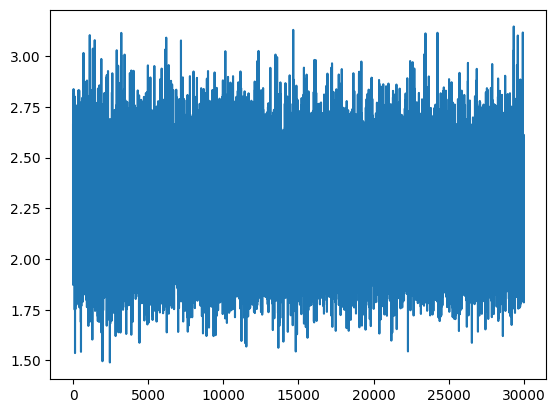

In [69]:
plt.plot(stepi, lossi)

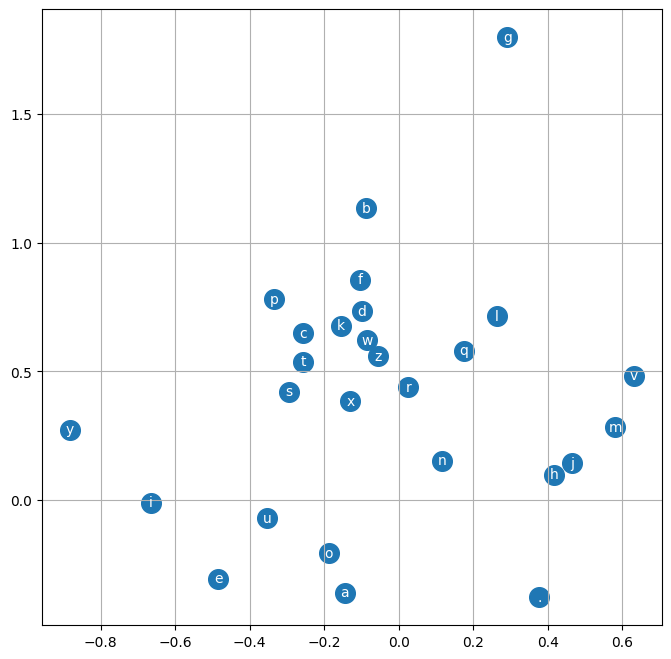

In [71]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), index_to_string[i], ha="center", va="center", color="white")
plt.grid('minor')

In [95]:
#the constraint can be now the embeddings, too much information compress into two single embedded variables, so we extend
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27,10), generator=g)
W1 = torch.randn((30,300), generator=g)
b1 = torch.randn(300, generator=g)
W2 = torch.randn((300,27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]
print(sum(p.nelement() for p in parameters))
for p in parameters:
    p.requires_grad = True

17697


In [96]:
lri = []
lossi = []
stepi = []

In [97]:
for i in range(200000):
    #minibatch construct
    ix = torch.randint(0, Xtr.shape[0], (32,))
    emb = C[Xtr[ix]] # (32, 3, 2)
    h = torch.tanh(emb.view(-1,30) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    #print(f"{i+1} => {loss.item()}")
    #backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    #lr = learning_rates[i]
    lr = 0.1 if i < 100000 else 0.01
    for p in parameters:
        p.data += -lr * p.grad

    #track stats
    #to plot and see how good are the learning rates
    #lri.append(learning_rate_exponencial[i])
    stepi.append(i)
    lossi.append(loss.log10().item())
    
print(f"{loss.item()}")

2.0390422344207764


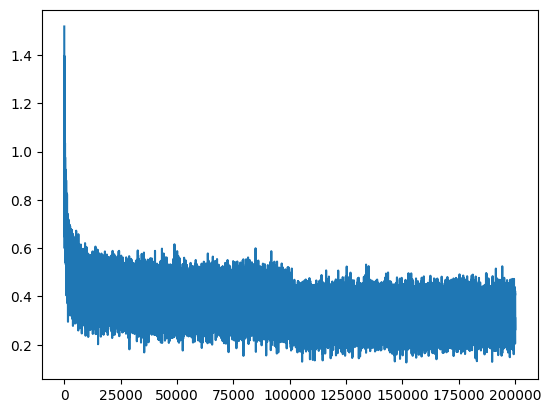

In [98]:
plt.plot(stepi, lossi)

In [99]:
#evaluate with training
emb = C[Xdev]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1839, grad_fn=<NllLossBackward0>)

In [100]:
#evaluate with dev
emb = C[Xtr]
h = torch.tanh(emb.view(-1,30) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1282, grad_fn=<NllLossBackward0>)

In [101]:
"""
So during development before going to prod, we do bunch of test trying to obtain the best val set value
we change, embeddings, layers inputs, batches sizes
once we got one with the target value that looks optimize for use lets say 1.58930 we use that and plublish
"""

'\nSo during development before going to prod, we do bunch of test trying to obtain the best val set value\nwe change, embeddings, layers inputs, batches sizes\nonce we got one with the target value that looks optimize for use lets say 1.58930 we use that and plublish\n'

In [102]:
#sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):

    out = []
    context =  [0] * block_size
    while True:
        emb = C[torch.tensor([context])] # (1, block_size, d)
        h = torch.tanh(emb.view(1 , -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(index_to_string[i] for i in out))

carmahela.
jhari.
kimri.
reviyah.
cassie.
rahiel.
ameryna.
areei.
nellara.
chaiivan.
leigh.
ham.
jorn.
quintis.
lilah.
jamilio.
jerma.
jarynix.
kaeliias.
brex.
